In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("Online Retail.xlsx")

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [21]:
df_products = pd.read_excel(excel_file, 'Products')
df_order_details = pd.read_excel(excel_file, 'Order Details')
df_orders = pd.read_excel(excel_file, 'Orders')
df_employees = pd.read_excel(excel_file, 'Employees')

1. Identify the top 5 and bottom 5 selling products in the company.

In [2]:

top_5_products = df_products.groupby('ProductName')['UnitsOnOrder'].sum().nlargest(5)
bottom_5_products = df_products.groupby('ProductName')['UnitsOnOrder'].sum().nsmallest(5)

print("Top 5 Selling Products:")
print(top_5_products)
print("\nBottom 5 Selling Products:")
print(bottom_5_products)


NameError: name 'df_products' is not defined

2.Identify the top 5 selling products and the salesmen who sell them. 

In [24]:
merged_df = df_order_details.merge(df_products[['ProductID', 'ProductName']], on='ProductID')
merged_df = merged_df.merge(df_orders[['OrderID', 'EmployeeID']], on='OrderID')

# Calculate total sales for each product-salesman combination
merged_df['TotalSales'] = merged_df['UnitPrice'] * merged_df['Quantity'] * (1 - merged_df['Discount'])
sales_by_product_salesman = merged_df.groupby(['ProductName', 'EmployeeID'])['TotalSales'].sum().reset_index()

# Get the top 5 selling products
top_5_products = sales_by_product_salesman.groupby('ProductName')['TotalSales'].sum().nlargest(5).index

# Filter the data for top 5 products and sort
top_5_sales = sales_by_product_salesman[sales_by_product_salesman['ProductName'].isin(top_5_products)].sort_values(['ProductName', 'TotalSales'], ascending=[True, False])

# Merge with Employees to get salesman names
top_5_sales = top_5_sales.merge(df_employees[['EmployeeID', 'FirstName', 'LastName']], on='EmployeeID')

# Format the output
top_5_sales['Salesman'] = top_5_sales['FirstName'] + ' ' + top_5_sales['LastName']
top_5_sales = top_5_sales[['ProductName', 'Salesman', 'TotalSales']]

print("Top 5 Selling Products and Their Salesmen:")
print(top_5_sales.to_string(index=False))

Top 5 Selling Products and Their Salesmen:
            ProductName         Salesman   TotalSales
      Camembert Pierrot  Janet Leverling 11109.500000
          Côte de Blaye  Janet Leverling 25559.500000
   Raclette Courdavault  Janet Leverling  5159.000000
         Tarte au sucre  Janet Leverling  9376.324990
Thüringer Rostbratwurst  Janet Leverling 12317.105000
      Camembert Pierrot Margaret Peacock  9542.099993
          Côte de Blaye Margaret Peacock 29432.949991
   Raclette Courdavault Margaret Peacock 10826.749959
         Tarte au sucre Margaret Peacock  5419.284994
Thüringer Rostbratwurst Margaret Peacock 13357.195985
      Camembert Pierrot    Nancy Davolio  8571.399992
          Côte de Blaye    Nancy Davolio 23570.074994
   Raclette Courdavault    Nancy Davolio  4903.799992
         Tarte au sucre    Nancy Davolio  9404.804996
Thüringer Rostbratwurst    Nancy Davolio  4623.603997
      Camembert Pierrot    Andrew Fuller  5773.199978
          Côte de Blaye    Andrew Fulle

3.Tabulate the total sales of each product, ship country wise. 

In [25]:
# Merge Order Details with Products, Orders, and Customers to get Ship Country
merged_df = df_order_details.merge(df_products[['ProductID', 'ProductName']], on='ProductID')
merged_df = merged_df.merge(df_orders[['OrderID', 'CustomerID', 'ShipCountry']], on='OrderID')

# Calculate total sales for each product and ship country
merged_df['TotalSales'] = merged_df['UnitPrice'] * merged_df['Quantity'] * (1 - merged_df['Discount'])
sales_by_product_country = merged_df.groupby(['ProductName', 'ShipCountry'])['TotalSales'].sum().reset_index()

# Display the result
print("Total Sales of Each Product, Ship Country Wise:")
print(sales_by_product_country.to_string(index=False))

Total Sales of Each Product, Ship Country Wise:
                     ProductName ShipCountry   TotalSales
                    Alice Mutton     Austria  6226.349992
                    Alice Mutton     Belgium  1248.000000
                    Alice Mutton      Brazil  1053.000000
                    Alice Mutton      Canada  3478.799998
                    Alice Mutton      France  2347.800000
                    Alice Mutton     Germany   351.000000
                    Alice Mutton       Italy   740.999999
                    Alice Mutton      Mexico  1341.600000
                    Alice Mutton       Spain  1918.800000
                    Alice Mutton      Sweden   312.000000
                    Alice Mutton          UK   877.499999
                    Alice Mutton         USA 12802.529993
                   Aniseed Syrup     Austria   430.000000
                   Aniseed Syrup      Canada   200.000000
                   Aniseed Syrup     Denmark   140.000000
                   Anise

4.Tabulate the total sales of “Boston Crab Meat” , customer wise.

In [26]:
df_customers = pd.read_excel(excel_file, 'Customers')

# Merge Order Details with Products, Orders, and Customers
merged_df = df_order_details.merge(df_products[['ProductID', 'ProductName']], on='ProductID')
merged_df = merged_df.merge(df_orders[['OrderID', 'CustomerID']], on='OrderID')
merged_df = merged_df.merge(df_customers[['CustomerID', 'CompanyName']], on='CustomerID')

# Calculate total sales for Boston Crab Meat, customer wise
merged_df['TotalSales'] = merged_df['UnitPrice'] * merged_df['Quantity'] * (1 - merged_df['Discount'])
boston_crab_sales = merged_df[merged_df['ProductName'] == 'Boston Crab Meat']
sales_by_customer = boston_crab_sales.groupby('CompanyName')['TotalSales'].sum().sort_values(ascending=False).reset_index()

print("Total Sales of Boston Crab Meat, Customer Wise:")
print(sales_by_customer.to_string(index=False))

# Calculate and print the total sales
total_sales = sales_by_customer['TotalSales'].sum()
print("\
Total Sales of Boston Crab Meat: $" + str(round(total_sales, 2)))

Total Sales of Boston Crab Meat, Customer Wise:
                      CompanyName  TotalSales
                       QUICK-Stop 2531.899997
                     Ernst Handel 1674.400000
               Save-a-lot Markets 1508.800000
               Berglunds snabbköp 1380.000000
                 HILARION-Abastos 1196.000000
                     Vaffeljernet 1029.999997
                  Königlich Essen  938.399993
                 LINO-Delicateses  920.000000
                         Bon app'  772.799999
                   Frankenversand  735.000000
     Hungry Owl All-Night Grocers  662.399999
                    Queen Cozinha  556.380000
            Bottom-Dollar Markets  551.250000
              Godos Cocina Típica  529.199999
              Lehmanns Marktstand  515.199998
               Ottilies Käseladen  368.000000
        Pericles Comidas clásicas  308.700000
                    Rancho grande  294.000000
                      Wilman Kala  220.800000
                     Maison Dewe

5.Tabulate the customer’s region wise sales of products in each category. 

In [27]:
df_categories = pd.read_excel(excel_file, 'Categories')

# Merge all necessary dataframes
merged_df = df_order_details.merge(df_products[['ProductID', 'ProductName', 'CategoryID']], on='ProductID')
merged_df = merged_df.merge(df_orders[['OrderID', 'CustomerID']], on='OrderID')
merged_df = merged_df.merge(df_customers[['CustomerID', 'Region']], on='CustomerID')
merged_df = merged_df.merge(df_categories[['CategoryID', 'CategoryName']], on='CategoryID')

# Calculate total sales
merged_df['TotalSales'] = merged_df['UnitPrice'] * merged_df['Quantity'] * (1 - merged_df['Discount'])

# Group by Region, CategoryName and sum the TotalSales
sales_by_region_category = merged_df.groupby(['Region', 'CategoryName'])['TotalSales'].sum().reset_index()

# Sort the results
sales_by_region_category = sales_by_region_category.sort_values(['Region', 'TotalSales'], ascending=[True, False])

# Display the results
print("Customer's Region-wise Sales of Products in Each Category:")
print(sales_by_region_category.to_string(index=False))

# Calculate total sales for each region
total_sales_by_region = sales_by_region_category.groupby('Region')['TotalSales'].sum().sort_values(ascending=False)

print("\
Total Sales by Region:")
print(total_sales_by_region.to_string())

# Calculate total sales for each category
total_sales_by_category = sales_by_region_category.groupby('CategoryName')['TotalSales'].sum().sort_values(ascending=False)

print("\
Total Sales by Category:")
print(total_sales_by_category.to_string())


Customer's Region-wise Sales of Products in Each Category:
       Region   CategoryName   TotalSales
           AK    Confections  3765.875000
           AK   Meat/Poultry  2851.499996
           AK      Beverages  2257.799994
           AK Grains/Cereals  2145.999995
           AK        Seafood  1832.999998
           AK        Produce   848.000000
           AK Dairy Products   802.500000
           AK     Condiments   672.787498
           BC    Confections  5926.874999
           BC Dairy Products  4790.549999
           BC        Seafood  2228.049999
           BC     Condiments  1950.574998
           BC        Produce  1872.000000
           BC      Beverages  1860.250000
           BC   Meat/Poultry  1692.000000
           BC Grains/Cereals  1003.800000
           CA     Condiments   931.369999
           CA Grains/Cereals   758.099999
           CA        Seafood   620.752500
           CA    Confections   380.000000
           CA   Meat/Poultry   223.500000
           CA    

6.Visualize the customer’s region wise sales of products in each category using an 
appropriate chart.   

<Figure size 1080x720 with 0 Axes>

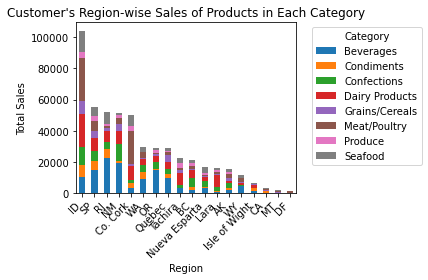

In [29]:

# Pivot the data to create a matrix suitable for stacked bar chart
pivot_data = sales_by_region_category.pivot(index='Region', columns='CategoryName', values='TotalSales')

# Sort regions by total sales
region_order = pivot_data.sum(axis=1).sort_values(ascending=False).index

# Create a stacked bar chart
plt.figure(figsize=(15, 10))
pivot_data.loc[region_order].plot(kind='bar', stacked=True)

plt.title('Customer\'s Region-wise Sales of Products in Each Category')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


7.Visualize the total sales of each product, employee wise with an appropriate chart

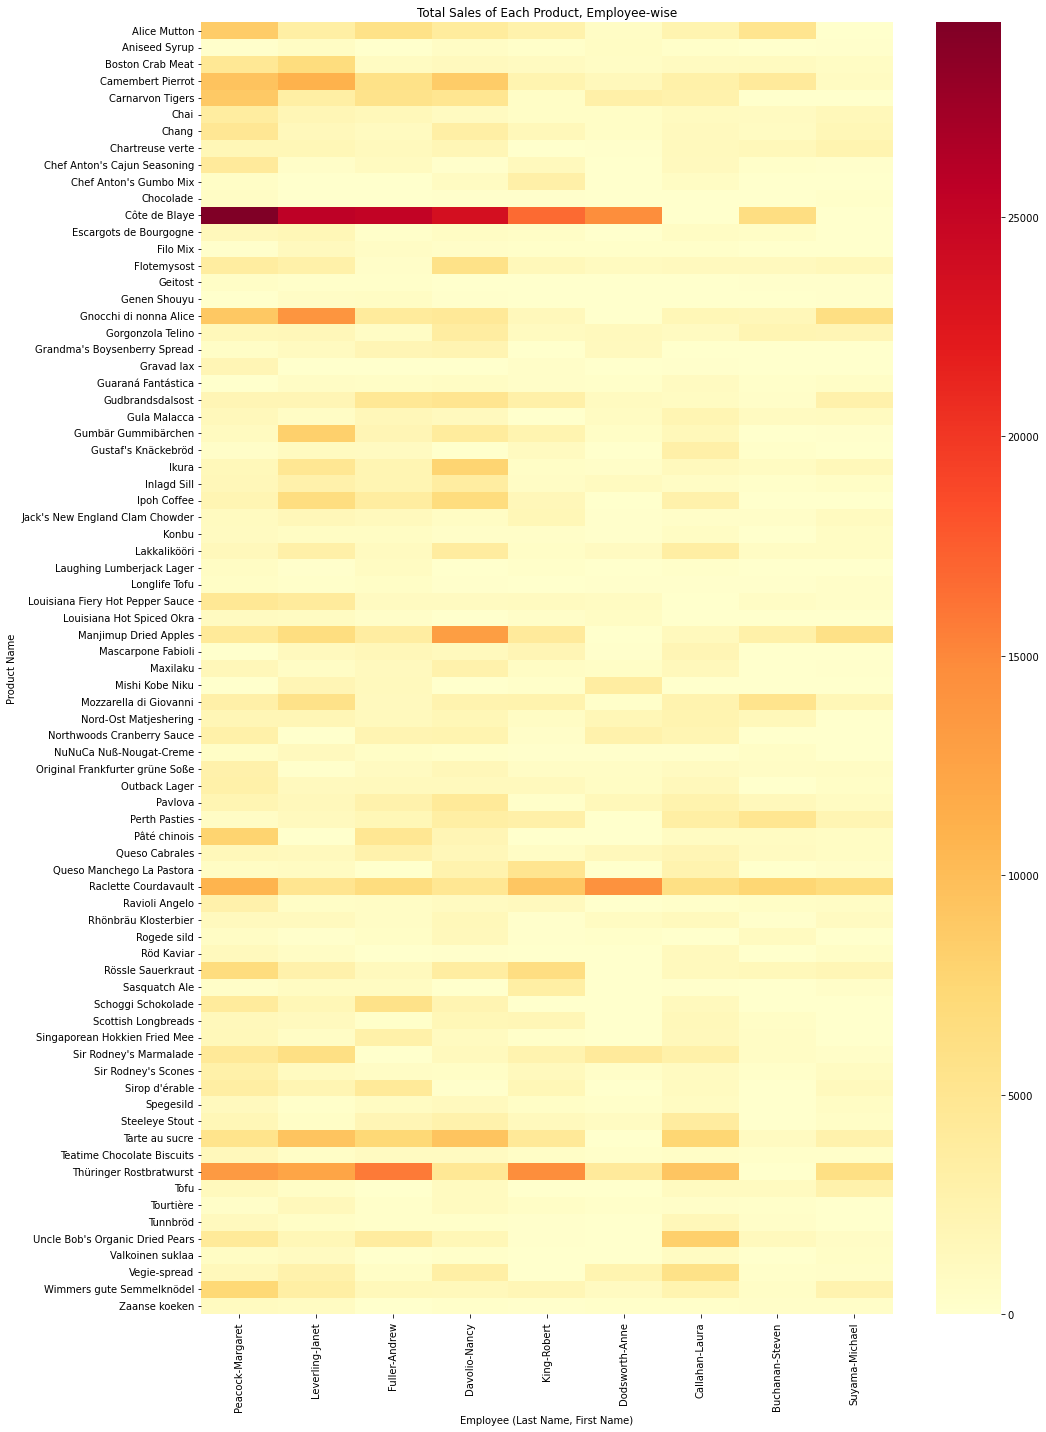

Top 10 Product-Employee Combinations by Sales:
 LastName FirstName             ProductName   TotalSales
  Peacock  Margaret           Côte de Blaye 29432.949991
Leverling     Janet           Côte de Blaye 25559.500000
   Fuller    Andrew           Côte de Blaye 25190.599987
  Davolio     Nancy           Côte de Blaye 23570.074994
     King    Robert           Côte de Blaye 16695.359938
   Fuller    Andrew Thüringer Rostbratwurst 15845.119998
     King    Robert Thüringer Rostbratwurst 14669.115000
Dodsworth      Anne           Côte de Blaye 14624.249994
Dodsworth      Anne    Raclette Courdavault 14201.549980
Leverling     Janet  Gnocchi di nonna Alice 13915.599996


In [30]:
merged_df = df_order_details.merge(df_products[['ProductID', 'ProductName']], on='ProductID')
merged_df = merged_df.merge(df_orders[['OrderID', 'EmployeeID']], on='OrderID')
merged_df = merged_df.merge(df_employees[['EmployeeID', 'LastName', 'FirstName']], on='EmployeeID')

# Calculate total sales
merged_df['TotalSales'] = merged_df['UnitPrice'] * merged_df['Quantity'] * (1 - merged_df['Discount'])

# Group by Employee and Product, and sum the TotalSales
sales_by_employee_product = merged_df.groupby(['LastName', 'FirstName', 'ProductName'])['TotalSales'].sum().reset_index()

# Sort by TotalSales
sales_by_employee_product = sales_by_employee_product.sort_values('TotalSales', ascending=False)

# Create a pivot table
pivot_data = sales_by_employee_product.pivot(index='ProductName', columns=['LastName', 'FirstName'], values='TotalSales')

# Fill NaN values with 0
pivot_data = pivot_data.fillna(0)

# Create a heatmap
plt.figure(figsize=(15, 20))
sns.heatmap(pivot_data, annot=False, cmap='YlOrRd', fmt='.0f')
plt.title('Total Sales of Each Product, Employee-wise')
plt.xlabel('Employee (Last Name, First Name)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

# Display top 10 product-employee combinations by sales
print("\
Top 10 Product-Employee Combinations by Sales:")
print(sales_by_employee_product.head(10).to_string(index=False))

8. Tabulate the total sales of each product, category-wise as a percentage of the entire series 

In [31]:
merged_df = df_order_details.merge(df_products[['ProductID', 'ProductName', 'CategoryID']], on='ProductID')
merged_df = merged_df.merge(df_categories[['CategoryID', 'CategoryName']], on='CategoryID')

# Calculate total sales
merged_df['TotalSales'] = merged_df['UnitPrice'] * merged_df['Quantity'] * (1 - merged_df['Discount'])

# Group by Category and Product, and sum the TotalSales
sales_by_category_product = merged_df.groupby(['CategoryName', 'ProductName'])['TotalSales'].sum().reset_index()

# Calculate the total sales for the entire series
total_sales = sales_by_category_product['TotalSales'].sum()

# Calculate the percentage of total sales for each product
sales_by_category_product['PercentageOfTotal'] = (sales_by_category_product['TotalSales'] / total_sales) * 100

# Sort by Category and PercentageOfTotal
sales_by_category_product = sales_by_category_product.sort_values(['CategoryName', 'PercentageOfTotal'], ascending=[True, False])

# Display the results
print("Total Sales of Each Product, Category-wise as a Percentage of the Entire Series:")
print(sales_by_category_product.to_string(index=False))

Total Sales of Each Product, Category-wise as a Percentage of the Entire Series:
  CategoryName                      ProductName    TotalSales  PercentageOfTotal
     Beverages                    Côte de Blaye 141396.734903          11.170605
     Beverages                      Ipoh Coffee  23526.699974           1.858653
     Beverages                            Chang  16355.959974           1.292151
     Beverages                     Lakkalikööri  15760.439977           1.245104
     Beverages                   Steeleye Stout  13643.999983           1.077901
     Beverages                             Chai  12788.099981           1.010284
     Beverages                 Chartreuse verte  12294.539985           0.971291
     Beverages                    Outback Lager  10672.649988           0.843159
     Beverages             Rhönbräu Klosterbier   8177.489992           0.646037
     Beverages                    Sasquatch Ale   6350.399993           0.501693
     Beverages              

9.Visualize the total sales of each product, category-wise as a percentage of the entire series

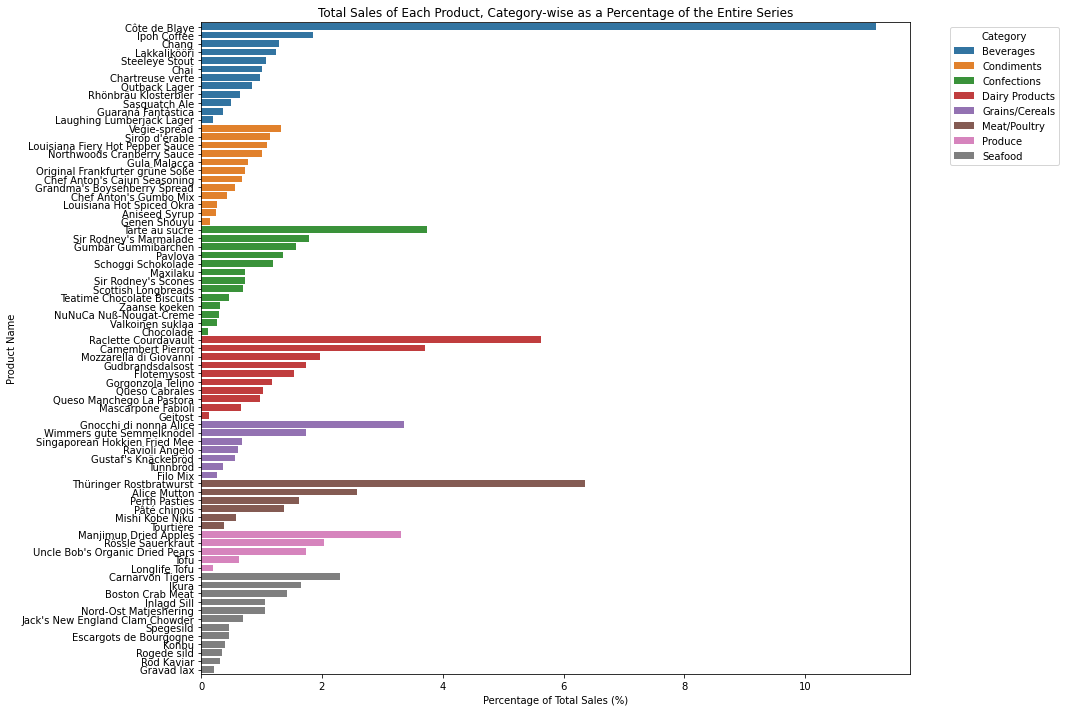

In [32]:
# Create a bar plot to visualize the total sales of each product, category-wise as a percentage of the entire series
plt.figure(figsize=(15, 10))
sns.barplot(data=sales_by_category_product, x='PercentageOfTotal', y='ProductName', hue='CategoryName', dodge=False)

plt.title('Total Sales of Each Product, Category-wise as a Percentage of the Entire Series')
plt.xlabel('Percentage of Total Sales (%)')
plt.ylabel('Product Name')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


10.Summarize the sales for each product, year wise and visualize the same in an 
appropriate chart.

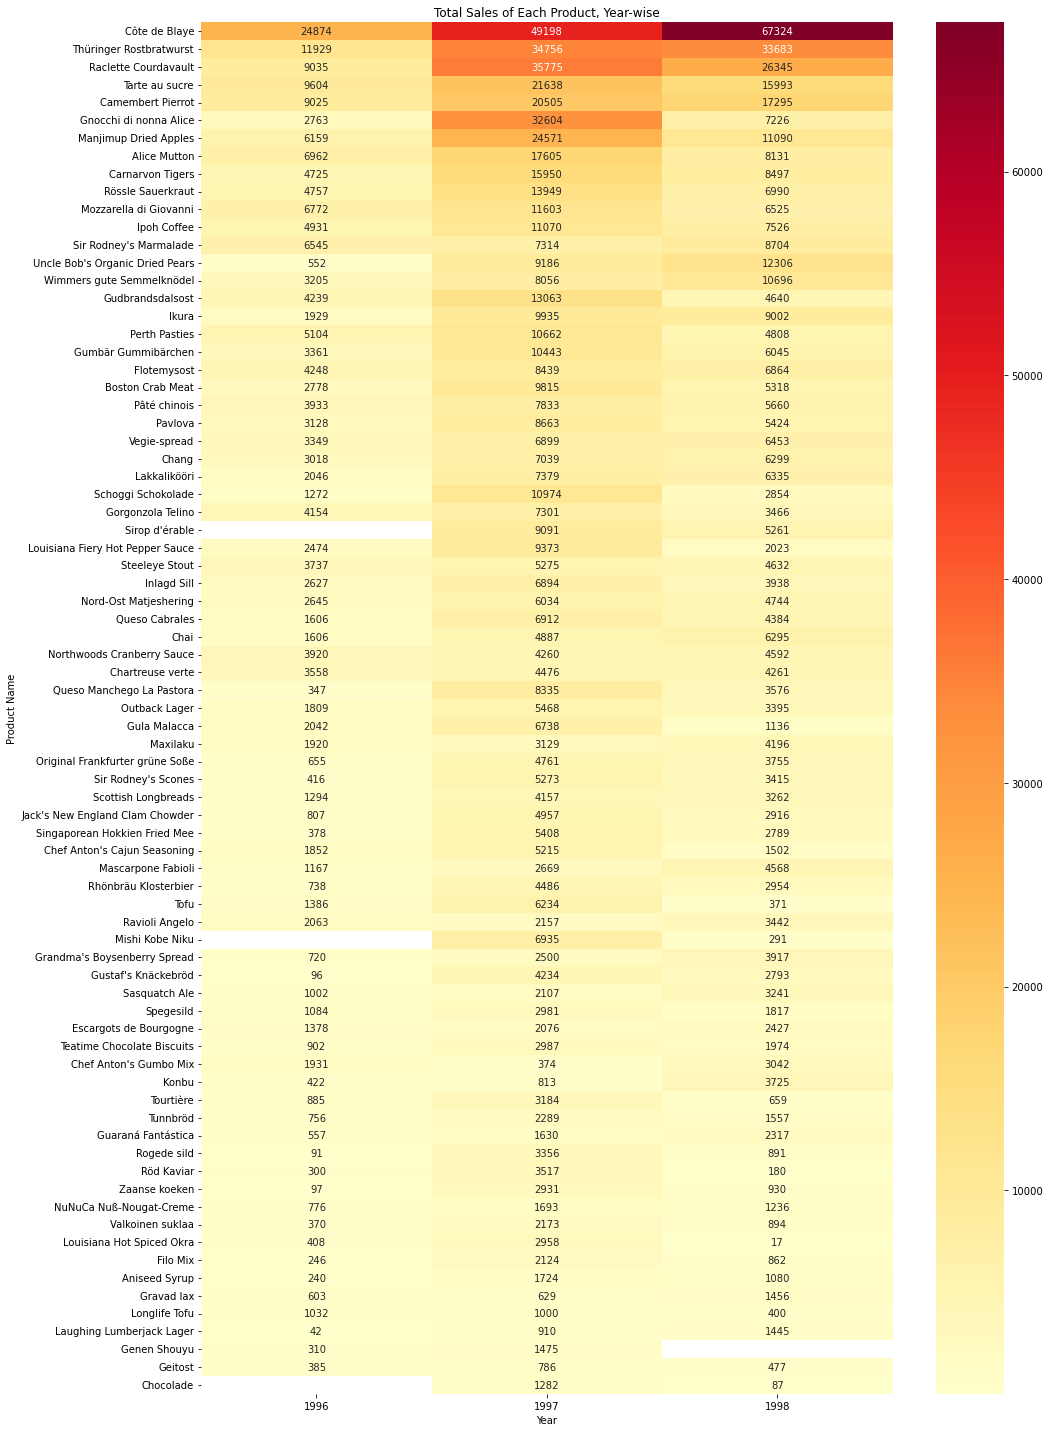

Top 10 Product-Year Combinations by Sales:
 Year             ProductName   TotalSales
 1998           Côte de Blaye 67324.249982
 1997           Côte de Blaye 49198.084959
 1997    Raclette Courdavault 35775.299948
 1997 Thüringer Rostbratwurst 34755.912979
 1998 Thüringer Rostbratwurst 33683.258999
 1997  Gnocchi di nonna Alice 32603.999969
 1998    Raclette Courdavault 26344.999993
 1996           Côte de Blaye 24874.399962
 1997   Manjimup Dried Apples 24570.799974
 1997          Tarte au sucre 21638.299974


In [33]:
# Merge necessary dataframes
merged_df = df_order_details.merge(df_products[['ProductID', 'ProductName']], on='ProductID')
merged_df = merged_df.merge(df_orders[['OrderID', 'OrderDate']], on='OrderID')

# Calculate total sales
merged_df['TotalSales'] = merged_df['UnitPrice'] * merged_df['Quantity'] * (1 - merged_df['Discount'])

# Extract year from OrderDate
merged_df['Year'] = pd.to_datetime(merged_df['OrderDate']).dt.year

# Group by Year and Product, and sum the TotalSales
sales_by_year_product = merged_df.groupby(['Year', 'ProductName'])['TotalSales'].sum().reset_index()

# Pivot the data for visualization
pivot_data = sales_by_year_product.pivot(index='ProductName', columns='Year', values='TotalSales')

# Sort products by total sales across all years
product_order = pivot_data.sum(axis=1).sort_values(ascending=False).index

# Create a heatmap
plt.figure(figsize=(15, 20))
sns.heatmap(pivot_data.loc[product_order], annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Total Sales of Each Product, Year-wise')
plt.xlabel('Year')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

# Display top 10 product-year combinations by sales
print("\
Top 10 Product-Year Combinations by Sales:")
print(sales_by_year_product.sort_values('TotalSales', ascending=False).head(10).to_string(index=False))